# 1. Install Dependencies and Setup

In [19]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [20]:
# !pip list

In [21]:
import tensorflow as tf
import os

In [22]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [23]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [24]:
import cv2
import imghdr

In [25]:
data_dir = 'data' 

In [26]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [27]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [28]:
import numpy as np
from matplotlib import pyplot as plt

In [29]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [30]:
data_iterator = data.as_numpy_iterator()

In [31]:
#  1= sad
# 0 = vui
batch[1]

NameError: name 'batch' is not defined

In [ ]:
batch = data_iterator.next()

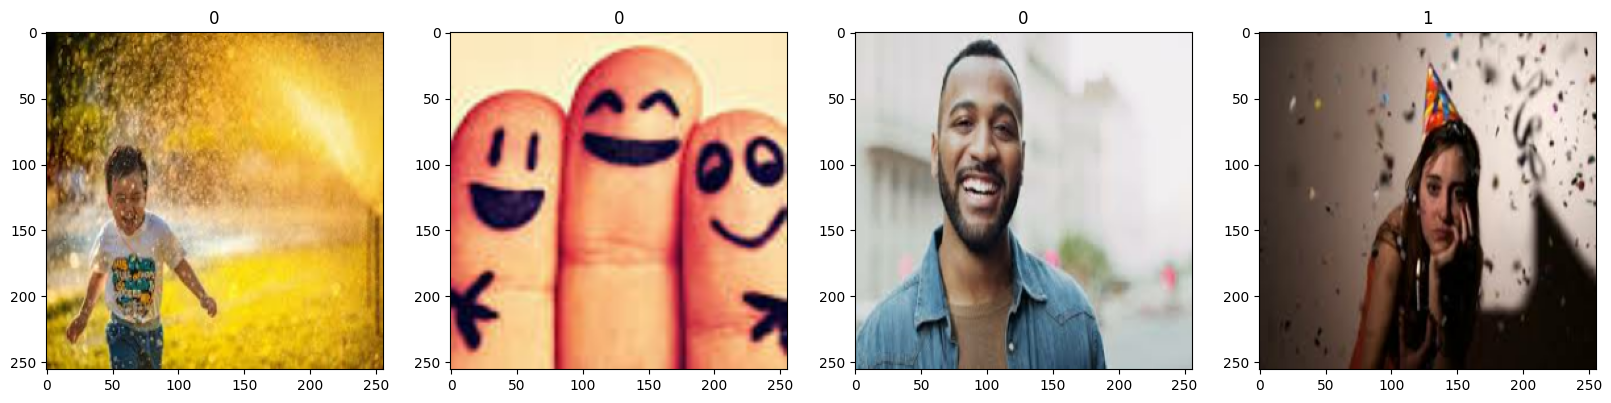

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.2528799 , 0.3313113 , 0.22542892],
          [0.22530638, 0.30373776, 0.19684437],
          [0.20784314, 0.28795955, 0.17310049],
          ...,
          [0.        , 0.07058824, 0.09803922],
          [0.        , 0.07349878, 0.09803922],
          [0.        , 0.07450981, 0.09803922]],
 
         [[0.25114363, 0.329575  , 0.22369266],
          [0.22579609, 0.30422747, 0.1978238 ],
          [0.20974265, 0.28904286, 0.1777157 ],
          ...,
          [0.        , 0.05919117, 0.08745835],
          [0.        , 0.06069192, 0.08664215],
          [0.        , 0.06468578, 0.08490589]],
 
         [[0.2460339 , 0.32336235, 0.21903962],
          [0.2238444 , 0.30117282, 0.19584195],
          [0.21011029, 0.28767568, 0.1804228 ],
          ...,
          [0.        , 0.04650735, 0.07540642],
          [0.        , 0.04650735, 0.07313974],
          [0.        , 0.05266831, 0.06876676]],
 
         ...,
 
         [[0.33858618, 0.45012543, 0.18838848],
          [0.36787

In [ ]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].min()

0.0

In [ ]:
len(data)

10

# 5. Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

7

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(test)

1

# 6. Build Deep Learning Model

In [ ]:
train

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

# 7. Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 5s 622ms/step - loss: 1.0505 - accuracy: 0.5000 - val_loss: 0.6894 - val_accuracy: 0.5312
Epoch 2/20
7/7 [==============================] - 5s 630ms/step - loss: 0.6579 - accuracy: 0.6027 - val_loss: 0.5938 - val_accuracy: 0.7344
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.5613 - accuracy: 0.7188 - val_loss: 0.5715 - val_accuracy: 0.7188
Epoch 4/20
7/7 [==============================] - 12s 1s/step - loss: 0.4492 - accuracy: 0.8214 - val_loss: 0.3859 - val_accuracy: 0.8594
Epoch 5/20
7/7 [==============================] - 12s 1s/step - loss: 0.3886 - accuracy: 0.8214 - val_loss: 0.3392 - val_accuracy: 0.8438
Epoch 6/20
7/7 [==============================] - 12s 1s/step - loss: 0.3425 - accuracy: 0.8571 - val_loss: 0.2642 - val_accuracy: 0.9375
Epoch 7/20
7/7 [==============================] - 12s 1s/step - loss: 0.2561 - accuracy: 0.9152 - val_loss: 0.1424 - val_accuracy: 0.9688
Epoch 8/20
7/7 [===============

# 8. Plot Performance

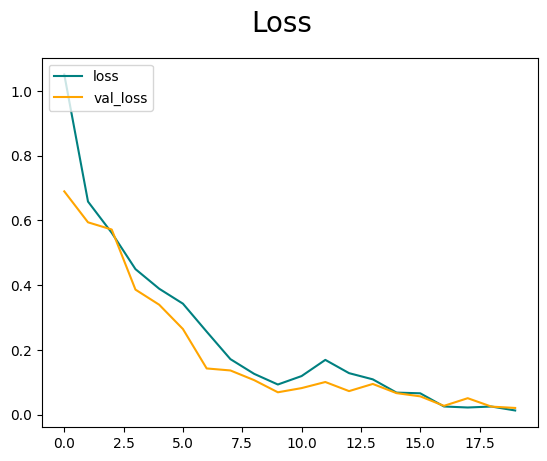

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

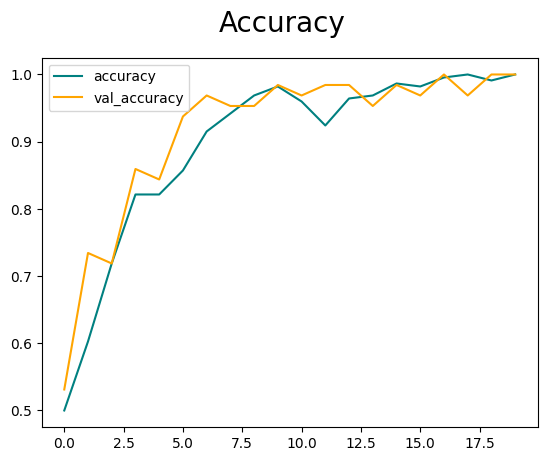

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [ ]:
import cv2

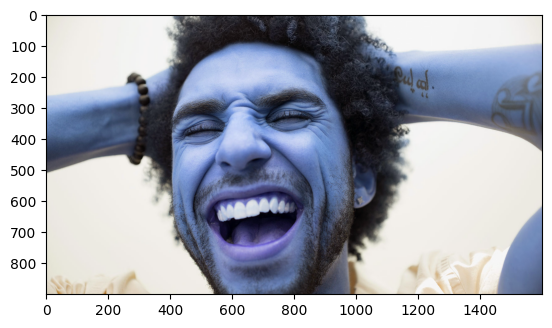

In [ ]:
img = cv2.imread('Happy_People_Happy_Man.jpg')
plt.imshow(img)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

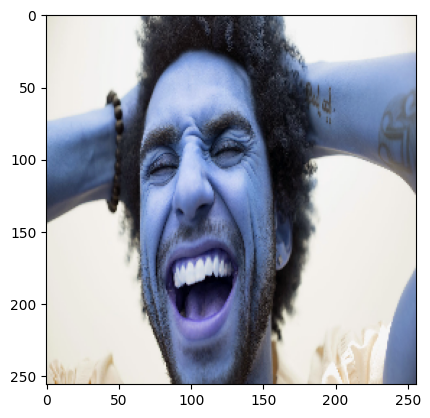

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))

NameError: name 'model' is not defined

In [ ]:
yhat

array([[0.9948567]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'du doan buc anh BUON')
else:
    print(f'du doan buc anh VUI VE')

du doan buc anh BUON


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','asd.h5'))

In [ ]:
new_model = load_model(os.path.join('models','asd.h5'))

In [ ]:
test = new_model.predict(np.expand_dims(resize/255, 0))
test

array([[0.9948567]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'du doan buc anh BUON')
else:
    print(f'du doan buc anh VUI VE')

du doan buc anh BUON
